In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
hr = np.random.randint(44,200, size=60)

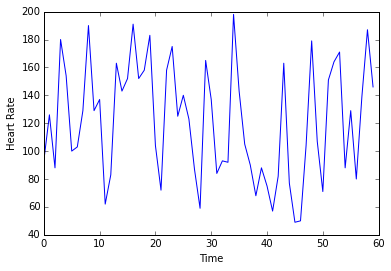

In [85]:
plt.plot(hr)
plt.xlabel('Time')
plt.ylabel('Heart Rate')

In [86]:
RR_intervals = 60000 / np.float_(hr)

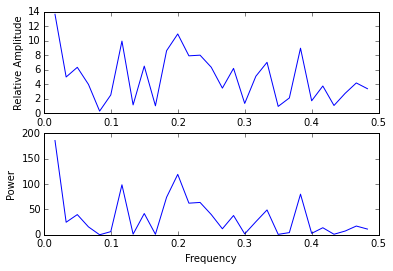

In [97]:
sample_spacing = 1.0 # seconds (samples are every 5 seconds)

hr_bps = hr / 60 # converts heart rate from beats per minute into beats per second 


F = np.fft.rfft(hr_bps)
PSD = np.abs(F)**2
N = len(hr_bps)

# sampling_rate = 1/sample_spacing # sampling rate is 12 times a minute

omegas = np.fft.fftfreq(N, sample_spacing) # obtain the frequencies 

positive_indicies = np.where(omegas > 0)
freqs = omegas[positive_indicies]
# magnitudes = np.abs(F[positive_indicies])

magnitudes = PSD[positive_indicies]
# magnitudes /= magnitudes.max() # normalization

plt.figure()
plt.subplot(211)
plt.plot(freqs, np.abs(F[positive_indicies]))

plt.xlabel('Frequency')
plt.ylabel('Relative Amplitude')

plt.subplot(212)
plt.plot(freqs, magnitudes)
plt.xlabel('Frequency')
plt.ylabel('Power')

# Very Low Frequency Extraction

In [88]:
VLF_indicies = np.where( (freqs < 0.04) & (freqs > 0.003) )
VLF = freqs[VLF_indicies]
VLF_mags = magnitudes[VLF_indicies]

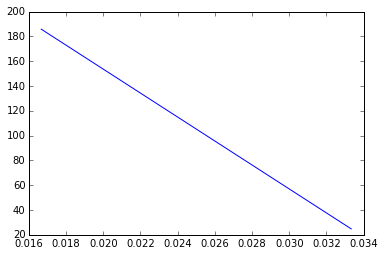

In [89]:
plt.plot(VLF, VLF_mags)

# Low Frequency Extraction

In [90]:
LF_indicies = np.where( (freqs < 0.15) & (freqs > 0.04) )
LF = freqs[LF_indicies]
LF_mags = magnitudes[LF_indicies]

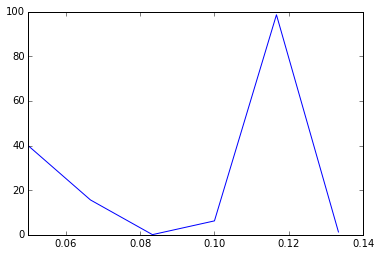

In [91]:
plt.plot(LF, LF_mags)

# High Frequency Extraction

In [92]:
HF_indicies = np.where( (freqs > 0.15) & (freqs < 0.4) )
HF = freqs[HF_indicies]
HF_mags = magnitudes[HF_indicies]

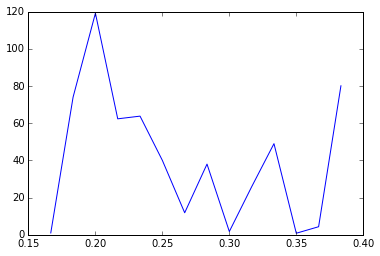

In [93]:
plt.plot(HF, HF_mags)

# Using `Scipy`


In [106]:
from scipy import signal

In [118]:
hr_bps = hr_bps - hr_bps.mean() #remove the offset

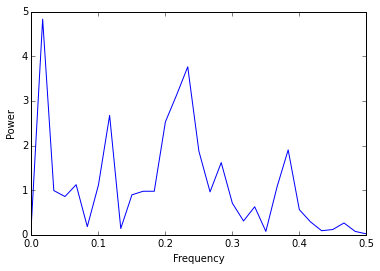

In [120]:
F, PSD = signal.welch(hr_bps, fs=1, window='hanning')
plt.plot(F, PSD)
plt.xlabel('Frequency')
plt.ylabel('Power')